<a href="https://colab.research.google.com/github/FirlisaAnggraeni/Virtual-Internship-Home-Credit/blob/main/Virtual_Internship_Home_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formulasi Masalah
Diberikan 8 dataset yang dapat digunakan untuk menganalisa kemampuan pelanggan dalam melunasi pinjaman. Bedrdasarkan data tersebut, permasalahan yang harus diselesaikan adalah model apakah yang tepat agar penentuan pelanggan yang mampu melunasi peminjaman  dilakukan secara tepat dan semaksimal mungkin.

In [41]:
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd 
pd.options.mode.chained_assignment = None
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.display import Image
from matplotlib import style
from scipy import stats
from six import StringIO
from sklearn import preprocessing,decomposition,linear_model
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


  

%matplotlib inline
plt.style.use("ggplot")

# Ekspolarasi Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#load data application train 
app_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit/application_train.csv')
 
#menampilkan 5 data pertama
app_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#load data application train
app_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit/application_test.csv')
 
#menampilkan 5 data pertama
app_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

#load data bureau
bureau = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit/bureau.csv')
 
#menampilkan 5 data pertama
bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [8]:
#load data credit card
cc_balance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit/credit_card_balance.csv')
 
#menampilkan 5 data pertama
cc_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
#load data Sample Submission
sample_sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit/sample_submission.csv')
 
#menampilkan 5 data pertama
sample_sub.head(5)

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [10]:
#load data Previous Application
prev_app = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit/previous_application.csv')
 
#menampilkan 5 data pertama
prev_app.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#CHECK DUPLICATES
app_train['SK_ID_CURR'].duplicated().unique()

array([False])

In [12]:
#load data credit card
POS_balance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Home Credit/POS_CASH_balance.csv')
 
#menampilkan 5 data pertama
POS_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [13]:
#Membalik urutan data agar data terbaru lebih cepat didapatkan serta menghapus data yang terdahulu
POS_balance = POS_balance.iloc[::-1]
POS_balance= POS_balance.drop_duplicates(subset=["SK_ID_CURR"], keep='first')

#Mengambil kolom 'SK_ID_CURR','CNT_INSTALMENT_FUTURE','CNT_INSTALMENT' dan digabungkan pada data train
POS_balance = POS_balance[['SK_ID_CURR','CNT_INSTALMENT_FUTURE','CNT_INSTALMENT']]
app_train = pd.merge(app_train, POS_balance, on='SK_ID_CURR', how='left')


In [14]:
#Check missing values
app_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
CNT_INSTALMENT_FUTURE         20247
CNT_INSTALMENT                20246
Length: 124, dtype: int64

In [15]:
#Isi missing value dengan 0 karena artinya, ID tersebut belum pernah meminjam di Home Credit
app_train['CNT_INSTALMENT_FUTURE'].fillna(0, inplace=True)
app_train['CNT_INSTALMENT'].fillna(0, inplace=True)

app_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
CNT_INSTALMENT_FUTURE             0
CNT_INSTALMENT                    0
Length: 124, dtype: int64

In [16]:
#Mengambil record terbaru/terakhir dari setiap ID_CURR
cc_balance = cc_balance.iloc[::-1]
cc_balance= cc_balance.drop_duplicates(subset=["SK_ID_CURR"], keep='first')
cc_balance = cc_balance[['SK_ID_CURR','AMT_CREDIT_LIMIT_ACTUAL']]
app_train = pd.merge(app_train, cc_balance, on='SK_ID_CURR', how='left')


In [17]:
app_train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
                               ...  
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
CNT_INSTALMENT_FUTURE              0
CNT_INSTALMENT                     0
AMT_CREDIT_LIMIT_ACTUAL       220606
Length: 125, dtype: int64

In [18]:
#Isi missing value dengan 0 karena artinya, ID tersebut tidak memiliki kartu kredit
app_train['AMT_CREDIT_LIMIT_ACTUAL'].fillna(0, inplace=True)

app_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
CNT_INSTALMENT_FUTURE             0
CNT_INSTALMENT                    0
AMT_CREDIT_LIMIT_ACTUAL           0
Length: 125, dtype: int64

In [19]:
#Menambah kolom AMT_APPLICATION pada data train untuk menambahkan total pinjaman sebelumnya
prev_sum = prev_app.groupby('SK_ID_CURR')['AMT_APPLICATION'].sum()
prev_sum = pd.DataFrame(prev_sum.reset_index())
app_train = pd.merge(app_train, prev_sum, on='SK_ID_CURR', how='left')




In [20]:
#Cek missing values
app_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_YEAR    41519
CNT_INSTALMENT_FUTURE             0
CNT_INSTALMENT                    0
AMT_CREDIT_LIMIT_ACTUAL           0
AMT_APPLICATION               16454
Length: 126, dtype: int64

In [21]:
#Isi missing values pada kolom AMT_APPLICATION dengan 0, karena artinya ID tersebut belum pernah mengajukan peminjaman
app_train['AMT_APPLICATION'].fillna(0, inplace=True)

app_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_YEAR    41519
CNT_INSTALMENT_FUTURE             0
CNT_INSTALMENT                    0
AMT_CREDIT_LIMIT_ACTUAL           0
AMT_APPLICATION                   0
Length: 126, dtype: int64

In [22]:
#Pemilihan fitur yang digunakan
app_train = app_train[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED','DAYS_REGISTRATION','OWN_CAR_AGE','OCCUPATION_TYPE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','CNT_INSTALMENT_FUTURE','CNT_INSTALMENT','AMT_CREDIT_LIMIT_ACTUAL','AMT_APPLICATION']]
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,CNT_INSTALMENT_FUTURE,CNT_INSTALMENT,AMT_CREDIT_LIMIT_ACTUAL,AMT_APPLICATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,2,2,Business Entity Type 3,0.0,0.0,20.0,24.0,0.0,179055.00
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Core staff,1,1,School,0.0,0.0,6.0,6.0,0.0,1306309.50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Laborers,2,2,Government,0.0,0.0,3.0,4.0,0.0,24282.00
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Laborers,2,2,Business Entity Type 3,NaN,NaN,8.0,12.0,270000.0,2449829.34
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Core staff,2,2,Religion,0.0,0.0,8.0,12.0,0.0,903181.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Sales staff,1,1,Services,NaN,NaN,6.0,8.0,0.0,40455.00
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,2,2,XNA,NaN,NaN,4.0,6.0,0.0,57595.50
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Managers,3,3,School,1.0,0.0,0.0,12.0,0.0,48325.50
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Laborers,2,2,Business Entity Type 1,0.0,0.0,9.0,16.0,0.0,242635.50


In [23]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [24]:
app_train.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
OWN_CAR_AGE                    202929
OCCUPATION_TYPE                 96391
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
ORGANIZATION_TYPE                   0
AMT_REQ_CREDIT_BUREAU_MON       41519
AMT_REQ_CREDIT_BUREAU_QRT       41519
CNT_INSTALMENT_FUTURE               0
CNT_INSTALMENT                      0
AMT_CREDIT_L

In [25]:
app_train['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [26]:
#Isi missing value AMT_ANNUITY dengan 0 dianggap tidak ada loan annuity
app_train['AMT_ANNUITY'].fillna(0, inplace=True)

#Isi missing value AMT_GOODS_PRICE dengan 0 dianggap tidak ada jaminan
app_train['AMT_GOODS_PRICE'].fillna(0, inplace=True)

#Isi missing value OWN_CAR_AGE dengan mode 
app_train['OWN_CAR_AGE'].fillna(app_train['OWN_CAR_AGE'].mode()[0], inplace=True)

#Isi missing value OCCUPATION_TYPE dengan mode 
app_train['OCCUPATION_TYPE'].fillna(app_train['OCCUPATION_TYPE'].mode()[0], inplace=True)

#Isi missing value AMT_REQ_CREDIT_BUREAU_MON dengan 0, dianggap tidak ada pengajuan pinjaman 1 bulan terakhir 
app_train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)

#Isi missing value AMT_REQ_CREDIT_BUREAU_QRT dengan 0, dianggap tidak ada pengajuan pinjaman 3 bulan terakhir 
app_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)







In [27]:
app_train.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
OWN_CAR_AGE                    0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
CNT_INSTALMENT_FUTURE          0
CNT_INSTALMENT                 0
AMT_CREDIT_LIMIT_ACTUAL        0
AMT_APPLICATION                0
dtype: int64

In [28]:
if app_train['NAME_CONTRACT_TYPE'].dtypes == 'O':
  print('FALSE')

FALSE


In [29]:
label_encoder = preprocessing.LabelEncoder()

cols = app_train.columns
  
# Encode labels ada kolom yag bertipe objek
for i in range(len(app_train.columns)):
  if app_train[cols[i]].dtypes == 'O':
    app_train[cols[i]]= label_encoder.fit_transform(app_train[cols[i]])
  

In [30]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  int64  
 3   CODE_GENDER                  307511 non-null  int64  
 4   FLAG_OWN_CAR                 307511 non-null  int64  
 5   FLAG_OWN_REALTY              307511 non-null  int64  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  int64  
 12  NAME_EDUCATION_TYPE          307511 non-null  int64  
 13 

## DATA TEST

In [31]:
#Menambahkan kolom baru seperti pada data train
app_test = pd.merge(app_test, POS_balance, on='SK_ID_CURR', how='left')
app_test= pd.merge(app_test, cc_balance, on='SK_ID_CURR', how='left')
app_test = pd.merge(app_test, prev_sum, on='SK_ID_CURR', how='left')

In [32]:
#Mengambil fitur yang akan digunakan
app_test = app_test[['SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED','DAYS_REGISTRATION','OWN_CAR_AGE','OCCUPATION_TYPE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','CNT_INSTALMENT_FUTURE','CNT_INSTALMENT','AMT_CREDIT_LIMIT_ACTUAL','AMT_APPLICATION']]
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,CNT_INSTALMENT_FUTURE,CNT_INSTALMENT,AMT_CREDIT_LIMIT_ACTUAL,AMT_APPLICATION
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,NaN,2,2,Kindergarten,0.0,0.0,3.0,4.0,NaN,24835.500
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,Low-skill Laborers,2,2,Self-employed,0.0,0.0,0.0,9.0,NaN,44617.500
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,Drivers,2,2,Transport: type 3,0.0,1.0,2.0,9.0,157500.0,523485.000
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,Sales staff,2,2,Business Entity Type 3,0.0,0.0,6.0,24.0,225000.0,246037.500
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,2,2,Business Entity Type 3,NaN,NaN,0.0,12.0,NaN,535455.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,NaN,3,3,Other,0.0,0.0,24.0,24.0,NaN,225000.000
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,Sales staff,2,2,Trade: type 7,NaN,NaN,3.0,24.0,NaN,347485.500
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,NaN,2,2,Business Entity Type 3,0.0,3.0,0.0,6.0,NaN,282120.165
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,Managers,2,2,Self-employed,0.0,0.0,10.0,10.0,NaN,568791.000


In [33]:
app_test.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       24
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
OWN_CAR_AGE                    32312
OCCUPATION_TYPE                15605
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
AMT_REQ_CREDIT_BUREAU_MON       6049
AMT_REQ_CREDIT_BUREAU_QRT       6049
CNT_INSTALMENT_FUTURE           1337
CNT_INSTALMENT                  1337
AMT_CREDIT_LIMIT_ACTUAL        32091
AMT_APPLICATION                  944
d

In [34]:
app_test['OWN_CAR_AGE'].mode()

0    4.0
Name: OWN_CAR_AGE, dtype: float64

In [35]:

#Isi missing value OWN_CAR_AGE dengan mode 
app_test['OWN_CAR_AGE'].fillna(app_test['OWN_CAR_AGE'].mode()[0], inplace=True)

#Isi missing value OCCUPATION_TYPE dengan mode 
app_test['OCCUPATION_TYPE'].fillna(app_test['OCCUPATION_TYPE'].mode()[0], inplace=True)

#Isi missing value AMT_ANNUITY dengan 0, dianggap tidak ada pinjaman
app_test['AMT_ANNUITY'].fillna(0, inplace=True)

#Isi missing value CNT_INSTALMENT_FUTURE dengan 0, dianggap tidak ada pinjaman
app_test['CNT_INSTALMENT_FUTURE'].fillna(0, inplace=True)

#Isi missing value CNT_INSTALMENT dengan 0, dianggap tidak ada pinjaman
app_test['CNT_INSTALMENT'].fillna(0, inplace=True)

#Isi missing value AMT_REQ_CREDIT_BUREAU_MON dengan 0, dianggap tidak ada pengajuan pinjaman 1 bulan terakhir 
app_test['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)

#Isi missing value AMT_REQ_CREDIT_BUREAU_QRT dengan 0, dianggap tidak ada pengajuan pinjaman 3 bulan terakhir 
app_test['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)

#Isi missing value AMT_CREDIT_LIMIT_ACTUAL dengan 0, dianggap tidak ada kartu kredit
app_test['AMT_CREDIT_LIMIT_ACTUAL'].fillna(0, inplace=True)

#Isi missing value AMT_APPLICATION dengan 0, dianggap tidak ada pinjaman sebelumnya
app_test['AMT_APPLICATION'].fillna(0, inplace=True)


In [36]:
app_test.isnull().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
OWN_CAR_AGE                    0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
CNT_INSTALMENT_FUTURE          0
CNT_INSTALMENT                 0
AMT_CREDIT_LIMIT_ACTUAL        0
AMT_APPLICATION                0
dtype: int64

In [37]:
label_encoder = preprocessing.LabelEncoder()

cols = app_test.columns
  
# Encode labels ada kolom yag bertipe objek
for i in range(len(app_test.columns)):
  if app_test[cols[i]].dtypes == 'O':
    app_test[cols[i]]= label_encoder.fit_transform(app_test[cols[i]])

In [38]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  int64  
 2   CODE_GENDER                  48744 non-null  int64  
 3   FLAG_OWN_CAR                 48744 non-null  int64  
 4   FLAG_OWN_REALTY              48744 non-null  int64  
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_ANNUITY                  48744 non-null  float64
 9   AMT_GOODS_PRICE              48744 non-null  float64
 10  NAME_INCOME_TYPE             48744 non-null  int64  
 11  NAME_EDUCATION_TYPE          48744 non-null  int64  
 12  NAME_FAMILY_STATUS           48744 non-null  int64  
 13  NAME_HOUSING_TYP

In [39]:
#Split app_train untuk train dan test agar dapat mengevaluasi model performance sebelum digunakan pada app_test

X_train, X_test, y_train, y_test = train_test_split(app_train.loc[:, app_train.columns != 'TARGET'], app_train['TARGET'], test_size=0.2, random_state=42)
# x_train = app_train.loc[:, app_train.columns != 'TARGET']
# y_train = app_train['TARGET']
# x_test = app_test

# Permodelan

In [42]:
def train_model(model, X_train, X_test, y_train, y_test):
    model = model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)
    train_f1 = f1_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)

    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)
    test_f1 = f1_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)

    print("==== Training Performance ====")
    print("Accuracy Score:", train_acc)
    print("F1 Score:", train_f1)
    print("Precision Score:", train_precision)
    print("Recall Score:", train_recall)
    
    print()
    print("==== Test Performance ====")
    print("Accuracy Score:", test_acc)
    print("F1 Score:", test_f1)
    print("Precision Score:", test_precision)
    print("Recall Score:", test_recall)
    
    print()
    print(classification_report(y_test, test_pred))
    #print(confusion_matrix(y_test, test_pred))
    return test_acc, test_recall, model, train_pred, test_pred

In [ ]:
#Logistic Regression
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)
  
Logistic = LogisticRegression()
Logistic.fit(xtrain, y_train)

LogisticRegression()

In [ ]:
log_acc, log_recall, log_model, log_train_pred, log_test_pred = train_model(Logistic, xtrain,xtest, y_train,y_test)

==== Training Performance ====
Accuracy Score: 0.9191814900328444
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0

==== Test Performance ====
Accuracy Score: 0.9195161211648212
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



In [ ]:
dst = DecisionTreeClassifier()
dst_acc, dst_recall, dst_model, dst_train_pred, dst_test_pred = train_model(dst, X_train,X_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0

==== Test Performance ====
Accuracy Score: 0.8456823244394582
F1 Score: 0.12063374409339386
Precision Score: 0.11139630390143737
Recall Score: 0.13154172560113153

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     56554
           1       0.11      0.13      0.12      4949

    accuracy                           0.85     61503
   macro avg       0.52      0.52      0.52     61503
weighted avg       0.86      0.85      0.85     61503



In [ ]:
randfor = RandomForestClassifier()
randfor_acc, randfor_recall, randfor_model, randfor_train_pred, randfor_test_pred = train_model(randfor, X_train,X_test, y_train, y_test)

==== Training Performance ====
Accuracy Score: 0.9999552860069592
F1 Score: 0.9997232077703128
Precision Score: 1.0
Recall Score: 0.9994465687261018

==== Test Performance ====
Accuracy Score: 0.9195161211648212
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



# Hyperparameter Tuning


In [ ]:
std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', logistic_Reg)])
n_components = list(range(1,X_train.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

clf_GS = RandomizedSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print()
print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

Best Penalty: l2
Best C: 1.2067926406393288
Best Number Of Components: 14

LogisticRegression(C=1.2067926406393288)


In [ ]:
#mendefinisikan DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=1234)
#set hyperparameter
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [5,6,7,8,9], 
          'min_samples_leaf':[1,2,3,4,5,6],
          'random_state':[123]}
#gunakan GridSearchCV untuk mencari parameter terbaik
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#training data x_train dan y_train
model1.fit(X_train, y_train)
#print value dari best estimator dan best hyperparamater
print("Best Estimator:\n",model1.best_estimator_)
print("Best Hyperparameters:\n",model1.best_params_)

Best Estimator:
 DecisionTreeClassifier(max_features='log2', min_samples_leaf=6,
                       min_samples_split=5, random_state=123)
Best Hyperparameters:
 {'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 5, 'random_state': 123}


In [ ]:
#mendefinisikan RandomForestClassifier
model=RandomForestClassifier()
#set hyperparameter
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#gunakan GridSearchCV untuk mencari parameter terbaik
model1 = RandomizedSearchCV(model, params, refit = True, cv=5)
#training data x_train dan y_train
model1.fit(X_train, y_train)
#print value dari best estimator dan best hyperparamater
print("Best Estimator:\n",model1.best_estimator_)
print("Best Hyperparameters:\n",model1.best_params_)

Best Estimator:
 RandomForestClassifier(criterion='entropy', min_samples_split=7,
                       n_estimators=25, n_jobs=-1, random_state=123)
Best Hyperparameters:
 {'random_state': 123, 'n_jobs': -1, 'n_estimators': 25, 'min_samples_split': 7, 'min_samples_leaf': 1, 'criterion': 'entropy'}


#Training Model dengan menggunakan semua data train dan melakukan prediksi pelanggan yang dapat melunasi pinjaman dengan mengggunakan data test

In [57]:
def train_model_real(model, X_train, X_test, y_train):
    model = model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)
    train_f1 = f1_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)

    test_pred = model.predict(X_test)
    # test_acc = model.score(X_test, y_test)
    # test_f1 = f1_score(y_test, test_pred)
    # test_precision = precision_score(y_test, test_pred)
    # test_recall = recall_score(y_test, test_pred)

    print("==== Training Performance ====")
    print("Accuracy Score:", train_acc)
    print("F1 Score:", train_f1)
    print("Precision Score:", train_precision)
    print("Recall Score:", train_recall)
    
    # print()
    # print("==== Test Performance ====")
    # print("Accuracy Score:", test_acc)
    # print("F1 Score:", test_f1)
    # print("Precision Score:", test_precision)
    # print("Recall Score:", test_recall)
    
    # print()
    # print(classification_report(y_test, test_pred))
    #print(confusion_matrix(y_test, test_pred))
    return train_acc, train_recall, model, train_pred, test_pred

In [44]:
#NEW data train dan test
train = app_train.loc[:, app_train.columns != 'TARGET']
test = app_test
ytrain = app_train['TARGET']

In [52]:
#Logistic Regression
        
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(train)
xtest = sc_x.transform(test)
  
Logistic = LogisticRegression(C=1.2067926406393288,  class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2', random_state=15,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
Logistic.fit(xtrain, ytrain)

LogisticRegression(C=1.2067926406393288, multi_class='multinomial',
                   random_state=15, solver='newton-cg')

In [58]:
log2_acc, log2_recall, log2_model, log2_train_pred, log2_test_pred = train_model_real(Logistic, xtrain ,xtest, ytrain)

==== Training Performance ====
Accuracy Score: 0.9192516690459853
F1 Score: 8.053799379857447e-05
Precision Score: 0.125
Recall Score: 4.028197381671702e-05


In [59]:
#Menyimpan hasil prediksi Logistic Regression
Results = pd.DataFrame()
Results['SK_ID_CURR'] = app_test['SK_ID_CURR']
Results['Logistic_Regression'] = log2_test_pred

In [62]:
#Decision Tree
dst2 = DecisionTreeClassifier(max_features='log2', min_samples_leaf=6, min_samples_split=5, random_state=123)
dst2_acc, dst2_recall, dst2_model, dst2_train_pred, dst2_test_pred = train_model_real(dst2, train, test, ytrain)

==== Training Performance ====
Accuracy Score: 0.9259896393950136
F1 Score: 0.28311336504236617
Precision Score: 0.6492343253394972
Recall Score: 0.18102719033232628


In [64]:
#Menyimpan hasil prediksi decision tree
Results['Decision_Tree'] = dst2_test_pred

In [65]:
#Random Forest
randfor2 = RandomForestClassifier(criterion='entropy', min_samples_split=7,n_estimators=25, n_jobs=-1, random_state=123)
randfor2_acc, randfor2_recall, randfor2_model, randfor2_train_pred, randfor2_test_pred = train_model_real(randfor2, train, test, ytrain)

==== Training Performance ====
Accuracy Score: 0.9622615125962973
F1 Score: 0.6949664870548035
Precision Score: 1.0
Recall Score: 0.5325276938569989


In [66]:
#Menyimpan hasil prediksi random forest
Results['Random_Forest'] = randfor2_test_pred

In [67]:
#Convert data ke csv
Results.to_csv('Results.csv', index=False, header=True)

In [ ]:
plot = pd.DataFrame()
plot['Model'] = ['Decision Tree', 'Logistic Regression','']

In [69]:
plot = Results.loc[:, Results.columns != 'SK_ID_CURR']
plot = plot.apply(pd.Series.value_counts)
plot

,Logistic_Regression,Decision_Tree,Random_Forest
0,48744.0,47710,48741
1,NaN,1034,3


In [72]:
plot['Logistic_Regression'].fillna(0, inplace=True)
plot

,Logistic_Regression,Decision_Tree,Random_Forest
0,48744.0,47710,48741
1,0.0,1034,3


In [86]:
bar = pd.DataFrame()
bar['0'] = [48744,47710,48741]
bar['1'] = [0,1034,3]
bar['name'] = ['Logistic_Regression','Decision_Tree','Random_Forest'] 
# bar.set_index(bar['name'],inplace=True)
# bar.drop('name', axis=1, inplace=True)
bar

,0,1,name
0,48744,0,Logistic_Regression
1,47710,1034,Decision_Tree
2,48741,3,Random_Forest


<Axes: xlabel='name'>

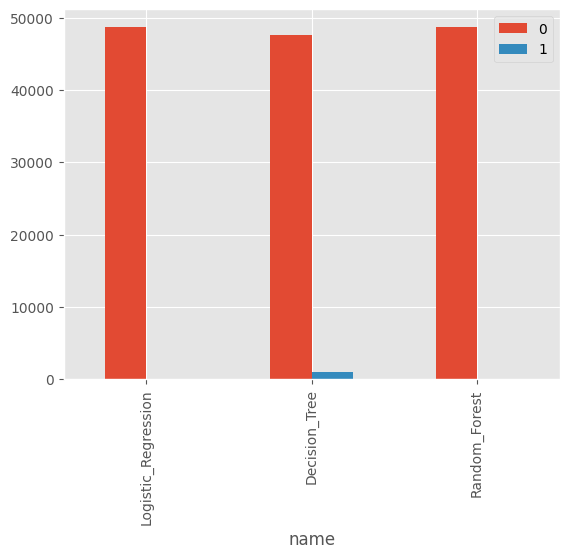

In [87]:
bar.plot(x='name', y=["0", "1"], kind="bar")

In [88]:
bar.set_index(bar['name'],inplace=True)
# bar.drop('name', axis=1, inplace=True)

In [90]:
bar.drop('name', axis=1)

,0,1
name,,
Logistic_Regression,48744,0
Decision_Tree,47710,1034
Random_Forest,48741,3
